# Radar moments through a non CVD and CVD lens
This notebook uses colorspacious to apply a CVD lens to common radar colormaps as well as CVD-friendlier colormaps. The lens that are applied are to simulate deuteranopia and protanopia.

This notebook is a modified version of Jon Thielen's notebook found here:
https://nbviewer.org/urls/dl.dropbox.com/s/nvnav3m9x5w8xf1/spectral_reflectivity_cm.ipynb

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pyart
from colorspacious import cspace_convert
from open_radar_data import DATASETS

import cmweather


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# Update matplotlib params to make neater plots.
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams.update({'axes.titlesize': 12})
matplotlib.rcParams.update({'axes.titley': 0.98})
matplotlib.rcParams.update({'figure.autolayout': True})

# C-band radar equivalent reflectivity factor
This provides a test on both the NWS Ref colormap as well as the ChaseSpectral colormap to showcase how each perform for those with non-CVD and CVD (deuteranopia and protanopia) for equivalent reflectivity factor.

In [3]:
from pyart.testing import get_test_data

filename = DATASETS.fetch('110635.nc')
radar = pyart.io.read(filename)

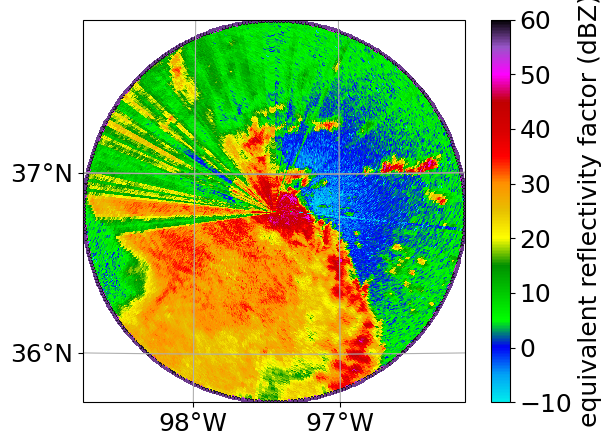

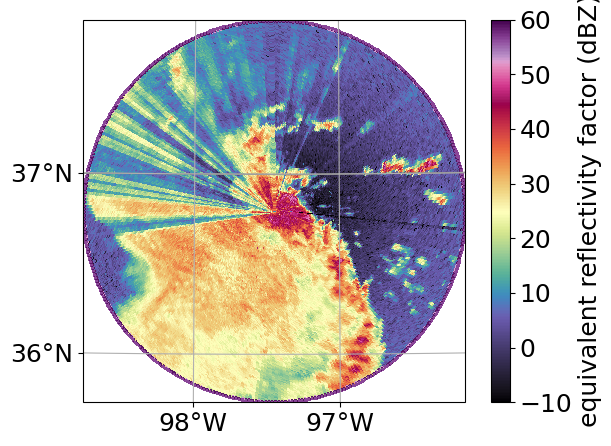

In [4]:
# Sample image for non-CVD RGB for NWS REF
fig = plt.figure()
ax = fig.gca()
# Plot reflectivity using pyart for NWS Ref
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map(
    'reflectivity', vmin=-10, title_flag=False, vmax=60, ax=ax, cmap='pyart_NWSRef'
)
ax.axis('off')
fig.canvas.draw()  # draw the canvas, cache the renderer

# Create an image from the plot.
image_from_plot_nws = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
image_from_plot_nws = image_from_plot_nws.reshape(fig.canvas.get_width_height()[::-1] + (4,))
image_from_plot_nws = image_from_plot_nws[:, :, 1:]
image_from_plot_nws = image_from_plot_nws / 255.0

# Sample image for non-CVD RGB for ChaseSpectral
fig = plt.figure()
ax = fig.gca()
# Plot reflectivity using pyart for ChaseSpectral
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map(
    'reflectivity', vmin=-10, title_flag=False, vmax=60, ax=ax, cmap='pyart_ChaseSpectral'
)
ax.axis('off')
fig.canvas.draw()  # draw the canvas, cache the renderer

# Create an image from the plot.
image_from_plot_chase = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
image_from_plot_chase = image_from_plot_chase.reshape(fig.canvas.get_width_height()[::-1] + (4,))
image_from_plot_chase = image_from_plot_chase[:, :, 1:]
image_from_plot_chase = image_from_plot_chase / 255.0

# Convert both NWS Ref and ChaseSpectral images to Deuteranopia
cvd_space_d = {"name": "sRGB1+CVD", "cvd_type": "deuteranomaly", "severity": 100}
img_d_nws = cspace_convert(image_from_plot_nws, cvd_space_d, "sRGB1")
img_d_chase = cspace_convert(image_from_plot_chase, cvd_space_d, "sRGB1")

# Convert both NWS Ref and ChaseSpectral images to Protanopia
cvd_space_p = {"name": "sRGB1+CVD", "cvd_type": "protanomaly", "severity": 100}
img_p_nws = cspace_convert(image_from_plot_nws, cvd_space_p, "sRGB1")

# Protanopia
cvd_space = {"name": "sRGB1+CVD", "cvd_type": "protanomaly", "severity": 100}
img_p_chase = cspace_convert(image_from_plot_chase, cvd_space_p, "sRGB1")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


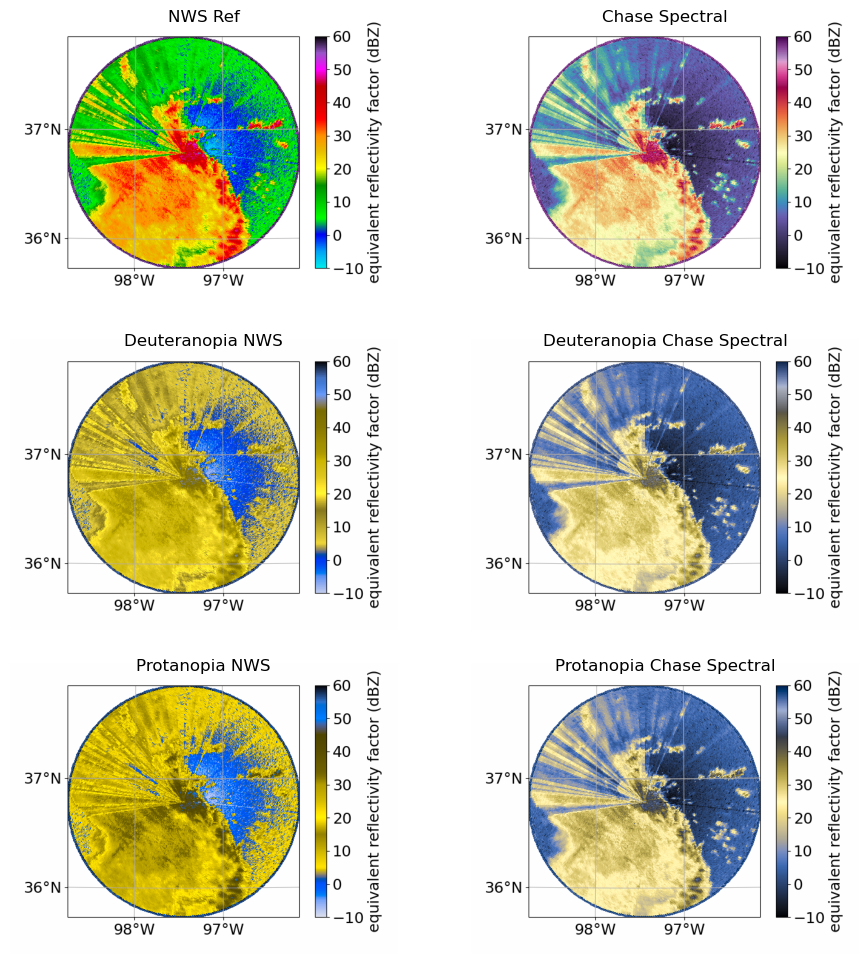

In [5]:
# Overall Figure with both original plots as well as the deuteranopia and protanopia images
fig, axes = plt.subplot_mosaic(
    [['ref', 'chase'], ['d_nws', 'd_chase'], ['p_nws', 'p_chase']], figsize=(10, 10)
)

axes['ref'].imshow(image_from_plot_nws)
axes['ref'].axis('off')
axes['ref'].set_title("NWS Ref", pad=-0.5)

axes['chase'].imshow(image_from_plot_chase)
axes['chase'].axis('off')
axes['chase'].set_title("Chase Spectral", pad=-0.5)

axes['d_nws'].imshow(img_d_nws)
axes['d_nws'].axis('off')
axes['d_nws'].set_title("Deuteranopia NWS", pad=-0.5)

# Plot ChaseSpectral for deuteranopia
axes['d_chase'].imshow(img_d_chase)
axes['d_chase'].axis('off')
axes['d_chase'].set_title("Deuteranopia Chase Spectral", pad=-0.5)

# Plot ChaseSpectral for deuteranopia
axes['p_nws'].imshow(img_p_nws)
axes['p_nws'].axis('off')
axes['p_nws'].set_title("Protanopia NWS", pad=-0.5)

axes['p_chase'].imshow(img_p_chase)
axes['p_chase'].axis('off')
axes['p_chase'].set_title("Protanopia Chase Spectral", pad=-0.5)

plt.tight_layout()
plt.show()

# C-band radar mean doppler velocity
This provides a test on both the NWS Vel colormap as well as the cmocean balance colormap (Thyng et al. 2016) to showcase how each perform for those with non-CVD and CVD (deuteranopia and protanopia) for mean doppler velocity.

Thyng, K. M., C. A. Greene, R. D. Hetland, H. M. Zimmerle, and S. F. DiMarco, 2016: True colors of oceanography: Guidelines for effective and accurate colormap selection. Oceanography, 29, 9–13, https://doi.org/10.5670/oceanog.2016.66.

In [6]:
# Retrieve the nyquist velocity to set vmin and vmax
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]

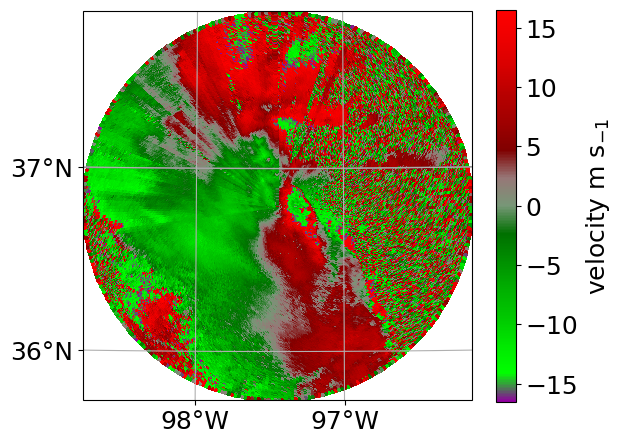

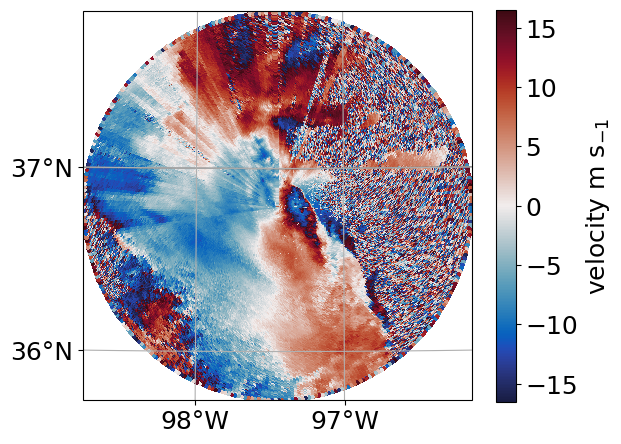

In [7]:
# Sample image in original RGB
fig = plt.figure()
ax = fig.gca()
# Plot velocity using pyart for NWS Vel
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map(
    'velocity',
    sweep=0,
    vmin=-nyq,
    title_flag=False,
    vmax=nyq,
    ax=ax,
    cmap='pyart_NWSVel',
    colorbar_label=r'velocity m s$_{-1}$',
)
ax.axis('off')
fig.canvas.draw()  # draw the canvas, cache the renderer

# Create an image from the plot.
image_from_plot_nws = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
image_from_plot_nws = image_from_plot_nws.reshape(fig.canvas.get_width_height()[::-1] + (4,))
image_from_plot_nws = image_from_plot_nws[:, :, 1:]
image_from_plot_nws = image_from_plot_nws / 255.0

# Sample image for non-CVD RGB for cmocean balance
fig = plt.figure()
ax = fig.gca()

# Plot velocity using pyart for cmocean balance
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map(
    'velocity',
    sweep=0,
    vmin=-nyq,
    vmax=nyq,
    title_flag=False,
    ax=ax,
    cmap='pyart_balance',
    colorbar_label=r'velocity m s$_{-1}$',
)
ax.axis('off')
fig.canvas.draw()  # draw the canvas, cache the renderer

# Create an image from the plot.
image_from_plot_cmocean = np.frombuffer(fig.canvas.tostring_argb(), dtype=np.uint8)
image_from_plot_cmocean = image_from_plot_cmocean.reshape(
    fig.canvas.get_width_height()[::-1] + (4,)
)
image_from_plot_cmocean = image_from_plot_cmocean[:, :, 1:]
image_from_plot_cmocean = image_from_plot_cmocean / 255.0

# Convert both NWS Vel and cmocean balance images to deuteranopia
cvd_space_d = {"name": "sRGB1+CVD", "cvd_type": "deuteranomaly", "severity": 100}
img_d_nws = cspace_convert(image_from_plot_nws, cvd_space_d, "sRGB1")
img_d_cmocean = cspace_convert(image_from_plot_cmocean, cvd_space_d, "sRGB1")

# Convert both NWS Vel and cmocean balance images to protanopia
cvd_space_p = {"name": "sRGB1+CVD", "cvd_type": "protanomaly", "severity": 100}
img_p_nws = cspace_convert(image_from_plot_nws, cvd_space_p, "sRGB1")
img_p_cmocean = cspace_convert(image_from_plot_cmocean, cvd_space_p, "sRGB1")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


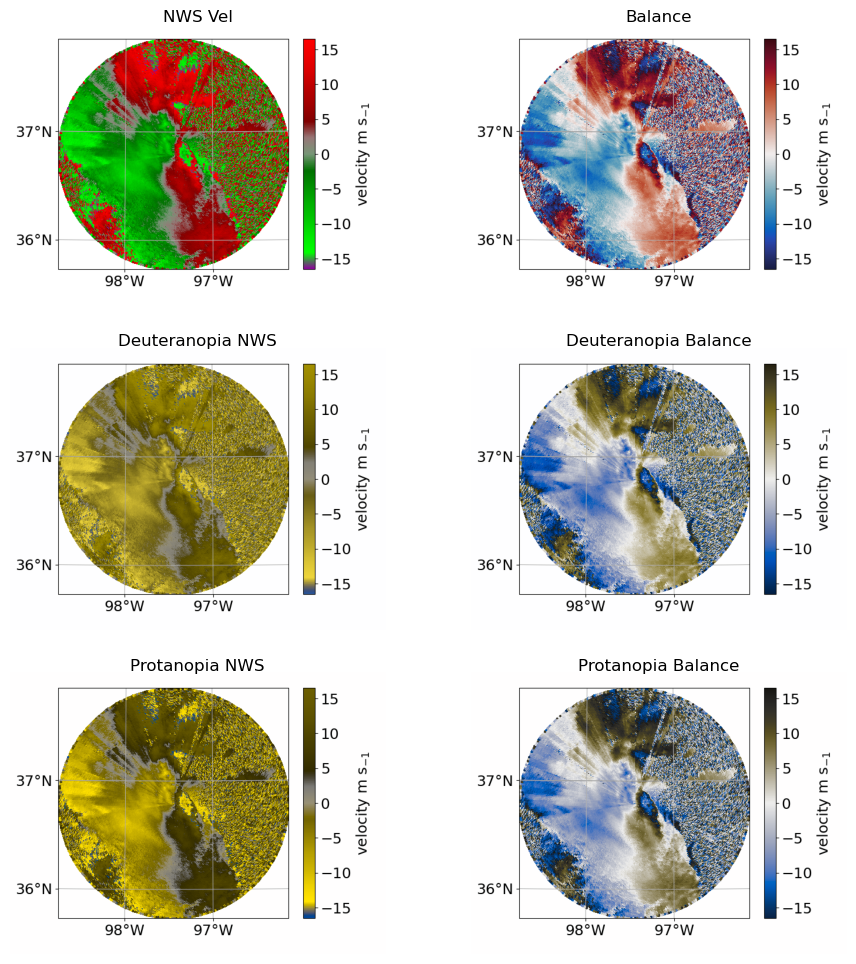

In [8]:
# Overall Figure
fig, axes = plt.subplot_mosaic(
    [['vel', 'cmocean'], ['d_nws', 'd_cmocean'], ['p_nws', 'p_cmocean']], figsize=(10, 10)
)


# Sample images
axes['vel'].imshow(image_from_plot_nws)
axes['vel'].axis('off')
axes['vel'].set_title("NWS Vel")

axes['cmocean'].imshow(image_from_plot_cmocean)
axes['cmocean'].axis('off')
axes['cmocean'].set_title("Balance")

axes['d_nws'].imshow(img_d_nws)
axes['d_nws'].axis('off')
axes['d_nws'].set_title("Deuteranopia NWS")


axes['d_cmocean'].imshow(img_d_cmocean)
axes['d_cmocean'].axis('off')
axes['d_cmocean'].set_title("Deuteranopia Balance")

axes['p_nws'].imshow(img_p_nws)
axes['p_nws'].axis('off')
axes['p_nws'].set_title("Protanopia NWS")

axes['p_cmocean'].imshow(img_p_cmocean)
axes['p_cmocean'].axis('off')
axes['p_cmocean'].set_title("Protanopia Balance")

plt.tight_layout()
plt.show()

# Conclusion

The problem with colormaps used in the radar community, such as the National Weather Service (NWS) equivalent reflectivity factor (i.e., Ze) is that many do not project well for those with CVD (i.e., green next to red). In working with the CVD community to address this problem, multiple colormaps for moments such as equivalent reflectivity factor and Doppler velocity were created for users with forms of CVD such as deuteranomaly, protanomaly, protanopia, and deuteranopia using Python tools such as colorspacious and viscm.

In this blog post, we show how these new CVD friendlier colormaps compare to the NWS colormap. We show how the newer colormaps are useful for those with CVD to be able to distinguish between features in a convective system, which they might not be able to with common colormaps used, such as the NWS colormaps.